<a href="https://colab.research.google.com/github/SathyaSudha-96/Deep-Learning-2021-22/blob/main/IDL_Assignment_3_SathyaSudhaMurugan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
data = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = data.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print('Shape of Training Images',train_images.shape)
print('Shape of Training Labels',train_labels.shape)
print('Shape of Testing Images',test_images.shape)
print('Shape of Testing Labels',test_labels.shape)

Shape of Training Images (60000, 28, 28)
Shape of Training Labels (60000,)
Shape of Testing Images (10000, 28, 28)
Shape of Testing Labels (10000,)


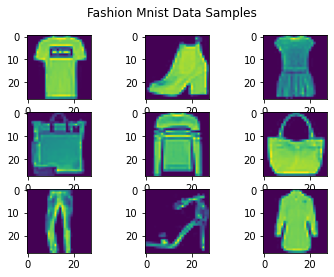

In [ ]:
figure, ax = plt.subplots(3,3)
figure.suptitle("Fashion Mnist Data Samples")
ax[0,0].imshow(train_images[1])
ax[0,1].imshow(train_images[800])
ax[0,2].imshow(train_images[3])
ax[1,0].imshow(train_images[408])
ax[1,1].imshow(train_images[5])
ax[1,2].imshow(train_images[100])
ax[2,0].imshow(train_images[7020])
ax[2,1].imshow(train_images[8])
ax[2,2].imshow(train_images[11209])

In [ ]:
#Convert the images into grey scale
train_data = tf.data.Dataset.from_tensor_slices(
    (train_images.reshape([-1, 28, 28, 1]).astype(np.float32) / 255, train_labels.astype(np.int32)))
train_data = train_data.shuffle(buffer_size=60000).batch(128)

test_images = test_images.reshape([-1, 28, 28, 1]).astype(np.float32) / 255
test_labels = test_labels.astype(np.int32)

In [ ]:
def training_Testing_loop(epochs, model,optimizer):
  loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
  train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
  test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
  for epoch in range(epochs):
    print("Starting epoch", epoch+1)
    for step, (image_batch, label_batch) in enumerate(train_data):
      with tf.GradientTape() as tape:
         logits = model(image_batch)
         loss = loss_fn(label_batch, logits)
      #Calculate gradients using gradient tape
      gradients = tape.gradient(loss, model.trainable_variables)
      #Assign new variables to the model using optimizer isntead of sub assign
      optimizer.apply_gradients(zip(gradients, model.trainable_variables))
      #Calculate  traning accuracy
      train_acc_metric(label_batch, logits)
    
      if not step % 100:
        #Calculate test accuracy
        test_acc_metric(test_labels, model(test_images))   
        print("Loss: {} Training Accuracy: {} Testing Accuracy: {}".format(loss, train_acc_metric.result(), test_acc_metric.result()))
        train_acc_metric.reset_states()
        test_acc_metric.reset_states()

Stochastic Gradient Descent Optimizer

In [ ]:
SGDmodel = Sequential([
  layers.Conv2D(16, (3,3), padding='same', activation='relu',input_shape = (28,28,1)),
  layers.MaxPooling2D((2,2),strides=2,padding="same"),
  layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D((2,2),strides=2,padding="same"),
  layers.Flatten(),
  layers.Dense(32, activation='relu'),
  layers.Dense(10)
])
SGDmodel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                50208     
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [ ]:
training_Testing_loop(5, SGDmodel, optimizer = tf.optimizers.SGD())

Starting epoch 1
Loss: 2.314415693283081 Training Accuracy: 0.0703125 Testing Accuracy: 0.08900000154972076
Loss: 2.1847658157348633 Training Accuracy: 0.2189062535762787 Testing Accuracy: 0.3725000023841858
Loss: 1.5486465692520142 Training Accuracy: 0.4520312547683716 Testing Accuracy: 0.5393999814987183
Loss: 0.9725189208984375 Training Accuracy: 0.6085156202316284 Testing Accuracy: 0.6207000017166138
Loss: 0.8635010123252869 Training Accuracy: 0.6603906154632568 Testing Accuracy: 0.6830000281333923
Starting epoch 2
Loss: 0.7950830459594727 Training Accuracy: 0.6989772915840149 Testing Accuracy: 0.6582000255584717
Loss: 0.6945128440856934 Training Accuracy: 0.7079687714576721 Testing Accuracy: 0.7184000015258789
Loss: 0.7392885088920593 Training Accuracy: 0.7265625 Testing Accuracy: 0.7387999892234802
Loss: 0.7436094284057617 Training Accuracy: 0.7415624856948853 Testing Accuracy: 0.7340999841690063
Loss: 0.7424077391624451 Training Accuracy: 0.7578125 Testing Accuracy: 0.7199000120



---



Adam optimizer

In [ ]:
AdamModel = Sequential([
  layers.Conv2D(16, (3,3), padding='same', activation='relu',input_shape = (28,28,1)),
  layers.MaxPooling2D((2,2),strides=2,padding="same"),
  layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D((2,2),strides=2,padding="same"),
  layers.Flatten(),
  layers.Dense(32, activation='relu'),
  layers.Dense(10)
])
training_Testing_loop(5, AdamModel, optimizer = tf.optimizers.Adam())

Starting epoch 1
Loss: 2.2889785766601562 Training Accuracy: 0.0859375 Testing Accuracy: 0.14079999923706055
Loss: 0.6659139394760132 Training Accuracy: 0.6426562666893005 Testing Accuracy: 0.745199978351593
Loss: 0.5688093900680542 Training Accuracy: 0.7860937714576721 Testing Accuracy: 0.7936000227928162
Loss: 0.458723247051239 Training Accuracy: 0.8192968964576721 Testing Accuracy: 0.820900022983551
Loss: 0.38341715931892395 Training Accuracy: 0.8350781202316284 Testing Accuracy: 0.8398000001907349
Starting epoch 2
Loss: 0.4046483635902405 Training Accuracy: 0.8452273011207581 Testing Accuracy: 0.8474000096321106
Loss: 0.341529905796051 Training Accuracy: 0.8532031178474426 Testing Accuracy: 0.8406999707221985
Loss: 0.40028107166290283 Training Accuracy: 0.8618749976158142 Testing Accuracy: 0.8575000166893005
Loss: 0.3450087010860443 Training Accuracy: 0.8655468821525574 Testing Accuracy: 0.857699990272522
Loss: 0.47466933727264404 Training Accuracy: 0.8623437285423279 Testing Accur



---



Padding = Valid

In [ ]:
Padding_Valid_Model = Sequential([
  layers.Conv2D(16, (3,3), padding='valid', activation='relu',input_shape = (28,28,1)),
  layers.MaxPooling2D((2,2),strides=2,padding="same"),
  layers.Conv2D(32, (3,3), padding='valid', activation='relu'),
  layers.MaxPooling2D((2,2),strides=2,padding="same"),
  layers.Flatten(),
  layers.Dense(32, activation='relu'),
  layers.Dense(10)
])
training_Testing_loop(5, Padding_Valid_Model, optimizer = tf.optimizers.Adam())

Starting epoch 1
Loss: 2.3120217323303223 Training Accuracy: 0.125 Testing Accuracy: 0.19900000095367432
Loss: 0.5755788087844849 Training Accuracy: 0.6299999952316284 Testing Accuracy: 0.758400022983551
Loss: 0.5122268795967102 Training Accuracy: 0.7782031297683716 Testing Accuracy: 0.79830002784729
Loss: 0.5320233106613159 Training Accuracy: 0.8207031488418579 Testing Accuracy: 0.817300021648407
Loss: 0.38586223125457764 Training Accuracy: 0.8333593606948853 Testing Accuracy: 0.8331000208854675
Starting epoch 2
Loss: 0.48267579078674316 Training Accuracy: 0.8403409123420715 Testing Accuracy: 0.8307999968528748
Loss: 0.3243441581726074 Training Accuracy: 0.8513281345367432 Testing Accuracy: 0.8513000011444092
Loss: 0.35763412714004517 Training Accuracy: 0.8539843559265137 Testing Accuracy: 0.8562999963760376
Loss: 0.34704887866973877 Training Accuracy: 0.8667968511581421 Testing Accuracy: 0.8618999719619751
Loss: 0.31231948733329773 Training Accuracy: 0.8716406226158142 Testing Accura



---



Kernel Size == Image Size

In [ ]:
F_28_Model = Sequential([
  layers.Conv2D(16, (28,28), padding='same', activation='relu',input_shape = (28,28,1)),
  layers.MaxPooling2D((2,2),strides=2,padding="same"),
  layers.Conv2D(32, (28,28), padding='same', activation='relu'),
  layers.MaxPooling2D((2,2),strides=2,padding="same"),
  layers.Flatten(),
  layers.Dense(32, activation='relu'),
  layers.Dense(10)
])
training_Testing_loop(1, F_28_Model, optimizer = tf.optimizers.Adam())

Starting epoch 1
Loss: 2.303438663482666 Training Accuracy: 0.109375 Testing Accuracy: 0.17100000381469727
Loss: 0.5788308382034302 Training Accuracy: 0.6776562333106995 Testing Accuracy: 0.7815999984741211
Loss: 0.5549430251121521 Training Accuracy: 0.8001562356948853 Testing Accuracy: 0.8119000196456909
Loss: 0.5636836290359497 Training Accuracy: 0.8307031393051147 Testing Accuracy: 0.8356000185012817
Loss: 0.4612565338611603 Training Accuracy: 0.8497655987739563 Testing Accuracy: 0.8425999879837036


⏳Too slow due to increased kernel size



---



Kernel Size = 1*1

In [ ]:
F_1_Model = Sequential([
  layers.Conv2D(16, (1,1), padding='same', activation='relu',input_shape = (28,28,1)),
  layers.MaxPooling2D((2,2),strides=2,padding="same"),
  layers.Conv2D(32, (1,1), padding='same', activation='relu'),
  layers.MaxPooling2D((2,2),strides=2,padding="same"),
  layers.Flatten(),
  layers.Dense(32, activation='relu'),
  layers.Dense(10)
])
training_Testing_loop(5, F_1_Model, optimizer = tf.optimizers.Adam())

Starting epoch 1
Loss: 2.298845052719116 Training Accuracy: 0.15625 Testing Accuracy: 0.13989999890327454
Loss: 0.8148911595344543 Training Accuracy: 0.5746874809265137 Testing Accuracy: 0.7117999792098999
Loss: 0.592463493347168 Training Accuracy: 0.7503906488418579 Testing Accuracy: 0.7770000100135803
Loss: 0.5503864884376526 Training Accuracy: 0.7815625071525574 Testing Accuracy: 0.7858999967575073
Loss: 0.5555033087730408 Training Accuracy: 0.800000011920929 Testing Accuracy: 0.8019999861717224
Starting epoch 2
Loss: 0.5289647579193115 Training Accuracy: 0.8100000023841858 Testing Accuracy: 0.7983999848365784
Loss: 0.43308040499687195 Training Accuracy: 0.8146093487739563 Testing Accuracy: 0.817300021648407
Loss: 0.4685356318950653 Training Accuracy: 0.8200781345367432 Testing Accuracy: 0.8141999840736389
Loss: 0.5268263816833496 Training Accuracy: 0.830859363079071 Testing Accuracy: 0.8224999904632568
Loss: 0.5233242511749268 Training Accuracy: 0.8317968845367432 Testing Accuracy:



---



Pooling with dimension 4*4

In [ ]:
Pooling_4_Model = Sequential([
  layers.Conv2D(16, (3,3), padding='valid', activation='relu',input_shape = (28,28,1)),
  layers.MaxPooling2D((4,4),1,padding="same"),
  layers.Conv2D(32, (3,3), padding='valid', activation='relu'),
  layers.MaxPooling2D((4,4), 1, padding="same"),
  layers.Flatten(),
  layers.Dense(32, activation='relu'),
  layers.Dense(10)
])
training_Testing_loop(5, Pooling_4_Model, optimizer = tf.optimizers.Adam())

Starting epoch 1
Loss: 2.2835373878479004 Training Accuracy: 0.1484375 Testing Accuracy: 0.1995999962091446
Loss: 0.46466413140296936 Training Accuracy: 0.7340624928474426 Testing Accuracy: 0.8213000297546387
Loss: 0.40999194979667664 Training Accuracy: 0.8318750262260437 Testing Accuracy: 0.8496000170707703
Loss: 0.41354691982269287 Training Accuracy: 0.8487499952316284 Testing Accuracy: 0.8615000247955322
Loss: 0.4983450770378113 Training Accuracy: 0.8695312738418579 Testing Accuracy: 0.8657000064849854
Starting epoch 2
Loss: 0.27232277393341064 Training Accuracy: 0.8762500286102295 Testing Accuracy: 0.8629999756813049
Loss: 0.29274046421051025 Training Accuracy: 0.8821874856948853 Testing Accuracy: 0.8673999905586243
Loss: 0.2952413558959961 Training Accuracy: 0.8836718797683716 Testing Accuracy: 0.8715999722480774
Loss: 0.3466992676258087 Training Accuracy: 0.8892187476158142 Testing Accuracy: 0.885699987411499
Loss: 0.2992004156112671 Training Accuracy: 0.892578125 Testing Accurac



---



In [ ]:
Model = Sequential([
  layers.Conv2D(16, (3,3), padding='valid', activation='relu',input_shape = (28,28,1),name = "Covn1"),
  layers.MaxPooling2D((2,2),strides=1,padding="same"),
  layers.Conv2D(32, (3,3), padding='valid', activation='relu', name = "Conv2"),
  layers.MaxPooling2D((2,2),strides=1,padding="same"),
  layers.Conv2D(64, (3,3), padding='valid', activation='relu', name = "Conv3"),
  layers.MaxPooling2D((2,2),strides=1,padding="same"),
  layers.Flatten(),
  layers.Dense(64, activation='relu', name = "FC1"),
  layers.Dense(10)
])

In [ ]:
training_Testing_loop(5, Model, optimizer = tf.optimizers.Adam())

Starting epoch 1
Loss: 2.301522731781006 Training Accuracy: 0.1015625 Testing Accuracy: 0.15889999270439148
Loss: 0.5083393454551697 Training Accuracy: 0.7528906464576721 Testing Accuracy: 0.8270999789237976
Loss: 0.2754203677177429 Training Accuracy: 0.8452343940734863 Testing Accuracy: 0.8597000241279602
Loss: 0.318996787071228 Training Accuracy: 0.8611719012260437 Testing Accuracy: 0.8500000238418579
Loss: 0.3986606299877167 Training Accuracy: 0.8793749809265137 Testing Accuracy: 0.8723000288009644
Starting epoch 2
Loss: 0.3746367394924164 Training Accuracy: 0.889090895652771 Testing Accuracy: 0.8751000165939331
Loss: 0.34307733178138733 Training Accuracy: 0.8931249976158142 Testing Accuracy: 0.8812999725341797
Loss: 0.309126615524292 Training Accuracy: 0.8959375023841858 Testing Accuracy: 0.8751000165939331
Loss: 0.25194382667541504 Training Accuracy: 0.8952343463897705 Testing Accuracy: 0.892300009727478
Loss: 0.24717816710472107 Training Accuracy: 0.9024999737739563 Testing Accur



---



CIFAR_10 Dataset

In [ ]:
cifar_data = tf.keras.datasets.cifar10
(train_images, train_labels),(test_images, test_labels) = cifar_data.load_data()
print('Shape of Training Images',train_images.shape)
print('Shape of Training Labels',train_labels.shape)
print('Shape of Testing Images',test_images.shape)
print('Shape of Testing Labels',test_labels.shape)

Shape of Training Images (50000, 32, 32, 3)
Shape of Training Labels (50000, 1)
Shape of Testing Images (10000, 32, 32, 3)
Shape of Testing Labels (10000, 1)


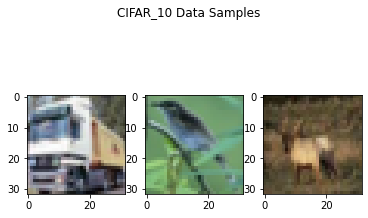

In [ ]:
figure, ax = plt.subplots(1,3)
figure.suptitle("CIFAR_10 Data Samples")
ax[0].imshow(train_images[1])
ax[1].imshow(train_images[800])
ax[2].imshow(train_images[3])

In [ ]:
train_data = tf.data.Dataset.from_tensor_slices(
    (train_images.astype(np.float32) / 255, train_labels.astype(np.int32)))
train_data = train_data.shuffle(50000).batch(128)

test_images = test_images.astype(np.float32) / 255
test_labels = test_labels.astype(np.int32)

In [ ]:
CIFAR_10_Model = Sequential([
  layers.Conv2D(16, (3,3), padding='valid', activation='relu',input_shape = (32,32,3),name = "Covn1"),
  layers.MaxPooling2D((2,2),strides=1,padding="same"),
  layers.Conv2D(32, (3,3), padding='valid', activation='relu', name = "Conv2"),
  layers.MaxPooling2D((2,2),strides=1,padding="same"),
  layers.Conv2D(64, (3,3), padding='valid', activation='relu', name = "Conv3"),
  layers.MaxPooling2D((2,2),strides=1,padding="same"),
  layers.Flatten(),
  layers.Dense(64, activation='relu', name = "FC1"),
  layers.Dense(10)
])

In [ ]:
training_Testing_loop(30, CIFAR_10_Model, optimizer = tf.optimizers.Adam())

Starting epoch 1
Loss: 2.339449405670166 Training Accuracy: 0.046875 Testing Accuracy: 0.1273999959230423
Loss: 1.597937822341919 Training Accuracy: 0.3162499964237213 Testing Accuracy: 0.4255000054836273
Loss: 1.2459075450897217 Training Accuracy: 0.4691406190395355 Testing Accuracy: 0.5058000087738037
Loss: 1.1241064071655273 Training Accuracy: 0.5353906154632568 Testing Accuracy: 0.5507000088691711
Starting epoch 2
Loss: 1.1858530044555664 Training Accuracy: 0.5668965578079224 Testing Accuracy: 0.5841000080108643
Loss: 1.3140521049499512 Training Accuracy: 0.6002343893051147 Testing Accuracy: 0.5953999757766724
Loss: 1.0446507930755615 Training Accuracy: 0.6126562356948853 Testing Accuracy: 0.6118999719619751
Loss: 0.9498509764671326 Training Accuracy: 0.6257030963897705 Testing Accuracy: 0.6262999773025513
Starting epoch 3
Loss: 0.8858129382133484 Training Accuracy: 0.6284482479095459 Testing Accuracy: 0.6186000108718872
Loss: 1.0243048667907715 Training Accuracy: 0.656640648841857

In [ ]:
CIFAR_dropout_Model = Sequential([
  layers.Conv2D(16, (3,3), padding='valid', activation='relu',input_shape = (32,32,3),name = "Covn1"),
  layers.MaxPooling2D((2,2),strides=1,padding="same"),
  layers.Dropout(0.2),
  layers.Conv2D(32, (3,3), padding='valid', activation='relu', name = "Conv2"),
  layers.MaxPooling2D((2,2),strides=1,padding="same"),
  layers.Dropout(0.2),
  layers.Conv2D(64, (3,3), padding='valid', activation='relu', name = "Conv3"),
  layers.MaxPooling2D((2,2),strides=1,padding="same"),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(64, activation='relu', name = "FC1"),
  layers.Dropout(0.2),
  layers.Dense(10)
])

In [ ]:
training_Testing_loop(30, CIFAR_dropout_Model, optimizer = tf.optimizers.Adam())

Starting epoch 1
Loss: 2.3049402236938477 Training Accuracy: 0.09375 Testing Accuracy: 0.10000000149011612
Loss: 1.5238747596740723 Training Accuracy: 0.3267187476158142 Testing Accuracy: 0.4092000126838684
Loss: 1.3331435918807983 Training Accuracy: 0.4666406214237213 Testing Accuracy: 0.5227000117301941
Loss: 1.206680178642273 Training Accuracy: 0.5278906226158142 Testing Accuracy: 0.5453000068664551
Starting epoch 2
Loss: 1.1221790313720703 Training Accuracy: 0.5627586245536804 Testing Accuracy: 0.5898000001907349
Loss: 1.0047526359558105 Training Accuracy: 0.598437488079071 Testing Accuracy: 0.602400004863739
Loss: 1.0351414680480957 Training Accuracy: 0.6098437309265137 Testing Accuracy: 0.6172999739646912
Loss: 1.0940032005310059 Training Accuracy: 0.6134374737739563 Testing Accuracy: 0.6252999901771545
Starting epoch 3
Loss: 0.9242159724235535 Training Accuracy: 0.6308620572090149 Testing Accuracy: 0.6365000009536743
Loss: 0.852637767791748 Training Accuracy: 0.6610156297683716 